# Trump Tweet Ananlysis
## Table of content
* 1.Reading csv
* 2.Preprocessing
    * 2.1 Extracting the year,month,dates,hour,minute,second from date coloumn
    * 2.2 Removing tag names from tweets
    * 2.3 preprocessing of tweet text
* 3.Most active hour on twitter
* 4.Number of tweet 
    * 4.1 Emotional Analysis over the years
* 5.Average number of tweet in a day
* 6.Most retweeted tweet
* 7.Most Like tweets
* 8.Most liked tweet durning Presidential year
* 9.Most retweeted tweet durning presidential year
* 10.Word priority
  * 10.1 Business year
  * 10.2 compain year
  * 10.3 presidential year

### 1. Reading csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import plotly.graph_objects as go
import kaleido

#ignore warning messages
import warnings
warnings.filterwarnings('ignore')
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import csv

from wordcloud import WordCloud
import re
from collections import Counter

import nltk

from sklearn.feature_extraction.text import CountVectorizer
import squarify

df= pd.read_csv("trump-tweets/trumptweets.csv")

In [13]:
colorblind = ['#67001f',
              '#a50026', 
              '#d73027', 
              '#f46d43', 
              '#fdae61', 
              '#fee090', 
              '#ffffbf',
              '#e0f3f8', 
              '#abd9e9', 
              '#74add1', 
              '#4575b4', 
              '#313695',
              '#053061'
             ]

In [3]:
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [4]:
df.drop(['id','link'],axis=1,inplace=True)
df.shape

(41122, 7)

### 2. Preprocessing

#### 2.1 Extracting the year,month,dates,hour,minute,second from date coloumn

In [5]:
year=[]
month=[]
date=[]
hour=[]
minute=[]
second=[]
for x in df['date']:
    year.append(int(x.split("-")[0]))
    month.append(int(x.split("-")[1]))
    date.append(int(x.split("-")[2].split(" ")[0]))
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))
    minute.append(int(x.split("-")[2].split(" ")[1].split(":")[1]))
    second.append(int(x.split("-")[2].split(" ")[1].split(":")[2]))

df['year']=year
df['month']=month
df['dates']=date
df['hour']=hour
df['minute']=minute
df['second']=second
df.drop(['date'],axis=1,inplace=True)

#### 2.2. Removing tag names from tweets

In [6]:
df.head()

,content,retweets,favorites,mentions,hashtags,geo,year,month,dates,hour,minute,second
0,Be sure to tune in and watch Donald Trump on L...,500,868,NaN,NaN,NaN,2009,5,4,20,54,25
1,Donald Trump will be appearing on The View tom...,33,273,NaN,NaN,NaN,2009,5,5,3,0,10
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,NaN,NaN,NaN,2009,5,8,15,38,8
3,New Blog Post: Celebrity Apprentice Finale and...,11,24,NaN,NaN,NaN,2009,5,8,22,40,15
4,"""My persona will never be that of a wallflower...",1399,1965,NaN,NaN,NaN,2009,5,12,16,7,28


In [7]:
regex ='@ \S+'
tweet = []  #1 tweet con 1 mention - 2  tweet con 3 mentions
data_to_save = []
year = ''
month = ''

for i in range(len(df)):
    #print(df.at[i, 'content'], df.at[i, 'year'], df.at[i, 'month'], "\n")
    tweet.append(str(df.at[i, 'content']))
    year = df.at[i, 'year']
    month = df.at[i, 'month']    
    t = str(df.at[i, 'content'])   
    list_to_save = [t, year, month]
    data_to_save.append(list_to_save)

#no apostrofo , no pic , no http
apostrofo = "[’':]\S+"
doppio_apice = '"\S+'

#http = "http\S+"
not_letters = '[^A-Za-z]+'
 
mentions = []
for t in tweet:
    for m in re.findall(regex, t, re.IGNORECASE):
        a = re.sub(apostrofo, '', m ) #tolgo apostrofo
        pp = re.sub(doppio_apice, '', a ) #tolgo doppio apice
        nl = re.sub(not_letters, '', pp)
        mentions.append(nl)

Top_twenty_mentions=Counter(mentions).most_common(30)

#### 2.3 preprocessing of tweet text
* remove url

In [8]:
# loading stop words from nltk library
nltk.download('stopwords')
from nltk.corpus import stopwords

item_to_find =[ "--donald", "donald", "j.", "trump", "realdonaldtrump"]
regex_mentions ='@ \S+'
stop_words = set(stopwords.words('english'))

def preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        #Removing link
        url_pattern = r'((http|ftp|https):\/\/)?[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?'
        total_text = re.sub(url_pattern, ' ', total_text)
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        total_text = total_text.lower()
        
        for word in total_text.split():
            if not word in stop_words:
                if not word in item_to_find: #tolgo le parole presenti nella lista
                    word=(word)
                    string += word + " "
        
        df[column][index] = string

for index, row in df.iterrows():
    if type(row['content']) is str:
        preprocessing(row['content'], index, 'content')
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df.head()

,content,retweets,favorites,mentions,hashtags,geo,year,month,dates,hour,minute,second
0,sure tune watch late night david letterman pre...,500,868,NaN,NaN,NaN,2009,5,4,20,54,25
1,appearing view tomorrow morning discuss celebr...,33,273,NaN,NaN,NaN,2009,5,5,3,0,10
2,reads top ten financial tips late show david l...,12,18,NaN,NaN,NaN,2009,5,8,15,38,8
3,new blog post celebrity apprentice finale less...,11,24,NaN,NaN,NaN,2009,5,8,22,40,15
4,persona never wallflower rather build walls cl...,1399,1965,NaN,NaN,NaN,2009,5,12,16,7,28


### 3. Most active hour on twitter

In [14]:
Category=df['hour'].value_counts().sort_index()

fig = px.pie(
    df,
    values = Category.values,
    labels = Category.index,
    #title = "Most active hour on Twitter",
    color_discrete_sequence = colorblind,
    #names = Category.index   
)
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

In [11]:
# import plotly.io as pio
# img = fig.write_image("fig1.png", width=600, height=350, scale=2)

In [12]:
hour = df['hour'].value_counts().reset_index(name='counts')

colors = ['#92c5de',] * 24
colors[0] = '#053061'

fig = go.Figure(data=[go.Bar(
    x=hour['index'],
    y=hour['counts'],
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout()

### 4. Number of tweet 

In [13]:
year = df['year'].value_counts().reset_index(name='counts')

colors = ['#92c5de',] * 12
colors[0] = '#053061'

fig = go.Figure(data=[go.Bar(
    x=year['index'],
    y=year['counts'],
    marker_color=colors, # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text="Numbers vs Years")

**OSSEVAZIONI** - Trump risulta molto attivo nel 2013 in quanto commenta ogni decisione presa da obama sul tema iran. Dal paragrafo 7 infatti notiamo come uno dei suoi tweet preferiti sia proprio un commento a questi fatti. Essendo lui repubblicano (al contrario di obama democratico) raccoglieva il consenso di tutta la fetta di popolazione che non si sentiva rappresentata dalle decisioni dell’allora presidente. Obama ormai non poteva essere rieletto, ma comunque spoiler not spoiler ha vinto alle elezioni successive a sorpresa contro Hillary Clinton(2017-2021)

#### 4.1 Sentiment Analysis of tweet

In [16]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarac\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
contents = df['content']
years = df['year']
list_years = years.tolist()
list_contents = contents.tolist()

#creo 2 dizionari per cui per ogni anno inserisco lista di testi
dict_contents = {}
dict_emotions_x_years = {}
for y in years:
    dict_contents[y] = []
    e = {
        'joy': 0,
        'anger': 0,
        'surprise': 0,
        'sadness': 0,
        'fear': 0
    }
    dict_emotions_x_years[y] = e

print(dict_contents, dict_emotions_x_years)

{2009: [], 2010: [], 2011: [], 2012: [], 2013: [], 2014: [], 2015: [], 2016: [], 2017: [], 2018: [], 2019: [], 2020: []} {2009: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2010: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2011: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2012: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2013: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2014: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2015: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2016: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2017: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2018: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2019: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}, 2020: {'joy': 0, 'anger': 0, 'surprise': 0, 'sadness': 0, 'fear': 0}}


In [18]:
#riempio i dizionari

for i in range(len(list_years)):
    content = list_contents[i]
    year = list_years[i]
    list_from_dict = dict_contents[year]
    list_from_dict.append(content)


In [19]:
#funzione che mi permette di calcolare quale è l'emozione prevalente di un testo
# somma questa emozione al dizionario corretto

def analyze_emotion(emotion_dict, dict_emotions, y):
    max_value = max(emotion_dict, key=emotion_dict.get)
    sub_dict = dict_emotions_x_years.get(y)
    
    if max_value  == 'Happy':
        sub_dict['joy'] = sub_dict.get('joy') + 1
        dict_emotions[y] = sub_dict 
    elif max_value  == 'Angry':
        sub_dict['anger'] = sub_dict.get('anger') + 1
        dict_emotions[y] = sub_dict 
    elif max_value  == 'Surprise':
        sub_dict['surprise'] = sub_dict.get('surprise') + 1
        dict_emotions[y] = sub_dict 
    elif max_value  == 'Sad':
        sub_dict['sadness'] = sub_dict.get('sadness') + 1
        dict_emotions[y] = sub_dict 
    else:
        sub_dict['fear'] = sub_dict.get('fear') + 1
        dict_emotions[y] = sub_dict 
    
    return dict_emotions

In [20]:
for y in dict_contents:
    for c in dict_contents[y]:
        emotion_dict = te.get_emotion(c)
        dict_emotions_x_years = analyze_emotion(emotion_dict, dict_emotions_x_years, y)

In [21]:
#trasforma il dizionario in una lista di liste per salvarlo in un csv

list_from_dict = []

for y in dict_emotions_x_years:
    sub_dict = dict_emotions_x_years[y]
    inner_list = [y, sub_dict['joy'], sub_dict['anger'], sub_dict['surprise'], sub_dict['sadness'], sub_dict['fear']]
    list_from_dict.append(inner_list)

In [66]:
#salvataggio nel csv
header = ['year','joy', 'anger', 'surprise', 'sadness', 'fear']
with open('emotions_x_years.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(list_from_dict)

#### 4.2 Visualizzazione della sentiment analysis

In [14]:
df_emotions = pd.read_csv("emotions_x_years.csv")
df_emotions.columns = ['year','joy', 'anger', 'surprise', 'sadness', 'fear']
df_emotions.head()

,year,joy,anger,surprise,sadness,fear
0,2009,15,1,32,1,7
1,2010,71,7,31,18,16
2,2011,261,30,187,145,247
3,2012,1519,188,914,649,920
4,2013,3657,324,1774,1062,1390


In [15]:
fig = px.line(df_emotions, x="year", y=df_emotions.columns[1:],
              title='Emotions Over the Years')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [16]:
# fig.write_image('andamento-emozioni.pdf', engine='kaleido', width=1080)

In [17]:
#altra visualizzazione
fig = px.parallel_categories(
    df_emotions, 
    dimensions=['year','joy', 'anger', 'surprise', 'sadness', 'fear'],
    color="year", 
    color_continuous_scale=colorblind,
    title='Andamento emozioni per anno')
fig.update_traces(dimensions=[{"categoryorder": "category descending"}])
fig.show()


In [18]:
df_anni= pd.read_csv("anni.csv")
anni=df_anni.columns
 
fig = px.parallel_categories(df_anni, dimensions=anni,
               color=[0,1,2,3,4], range_color=[0,4],color_continuous_scale=colorblind,
               title='Andamento emozioni per anno')
fig.update_traces(dimensions=[{"categoryorder": "category descending"}])
fig.update_layout(coloraxis_colorbar=dict(title="legend", ticks='outside'))
 
fig.update_coloraxes(colorbar_tickmode='array')
fig.update_coloraxes(colorbar_ticktext=df_anni['emotions'])
fig.update_coloraxes(colorbar_tickvals=[0,1,2,3,4])
 
fig.show()
#fig.write_image('emozioni-x-anno.pdf', engine='kaleido', width=1080)


### 5. Average number of tweet in a day per year

In [19]:
import plotly.graph_objects as go
    
Category=(df['year'].value_counts()/365).sort_index()
Category
x=Category.index
y=Category.values

layout = go.Layout(
   paper_bgcolor='rgba(0,0,0,0)',
   plot_bgcolor='rgba(0,0,0,0)'
)
fig = go.Figure(layout=layout)
fig.update_layout(yaxis={'visible': False, 'showticklabels': False})
 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
 
fig.add_trace(
   go.Scatter(
       x=x,
       y=p(x),
       mode='lines',
       name='trend',
       marker=dict(color='#b2182b')
   ))
 
y_arrotondati=[]

for n in y:
    if (n>0 and n<1) :
        y_arrotondati.append(round(n,1))
    else:
        y_arrotondati.append(int(n))

fig.add_trace(
   go.Bar(
       x=x,
       y=y,
       name='media tweet x giorno',
       text = y_arrotondati,
       marker=dict(color='#d1e5f0')
   ))
 
fig.show()

### 6. Most retweeted tweet

In [20]:
for index, value in df['retweets'].nlargest(3).items():
    print('contenuto: ' , df.iloc[index]['content'], '|| anno: ', df.iloc[index]['year'])

contenuto:  fraudnewscnn  || anno:  2017
contenuto:  today make america great  || anno:  2016
contenuto:  allowed impeach president gross incompetence  || anno:  2014


### 7. Most Like tweets 

In [21]:
for index, value in df['favorites'].nlargest(3).items():
    print('contenuto: ' ,df.iloc[index]['content'], '|| anno: ', df.iloc[index]['year'])


contenuto:  ap rocky released prison way home united states sweden rocky week get home asap ap  || anno:  2019
contenuto:   || anno:  2020
contenuto:  well missiles launched iran two military bases located iraq assessment casualties damages taking place far good powerful well equipped military anywhere world far making statement tomorrow morning  || anno:  2020


### 8. Most tag names from tweets

In [22]:
from collections import Counter
import re

columns = ['account', 'mentions']
data = pd.read_csv('top20.csv', names = columns)

reversed = data[::-1]
data = reversed
#print(reversed)
number = data['mentions'][9:19] #ho tolto il 1° ,realDonaldTrump, perchè il dataset contiene RT
name = data['account'][9:19]
 
fig = go.Figure(
   data=[
       go.Bar(x=number, y=name)])
 
fig.update_traces(
   orientation='h',
   text=number,
   marker_color='#d73027',
   opacity=0.8)

fig.update_layout(
   plot_bgcolor='#ffffff',
   title=go.layout.Title(
      text="10 most mentioned accounts<br>",
      xref="paper",
      x=0
  ))
fig.show()
fig.write_image('top10mentions.pdf', width=1080, engine='kaleido')

### 9. Most liked tweet durning Presidential year

In [23]:
president_date=president_year=df[((df['year']>=2017) &(df['month']>1))]
print(df.iloc[president_date['favorites'].idxmax()]['content'])
print(df.iloc[president_date['favorites'].idxmax()]['year'])

ap rocky released prison way home united states sweden rocky week get home asap ap 
2019


### 10. Most retweeted tweet durning presidential year

In [24]:
president_date=president_year=df[((df['year']>=2017) &(df['month']>1))]
print(df.iloc[president_date['retweets'].idxmax()]['content'])
print(df.iloc[president_date['retweets'].idxmax()]['year'])

fraudnewscnn 
2017


### 11. Word priority

#### 11.1 Durning Business Year - TREE MAPS

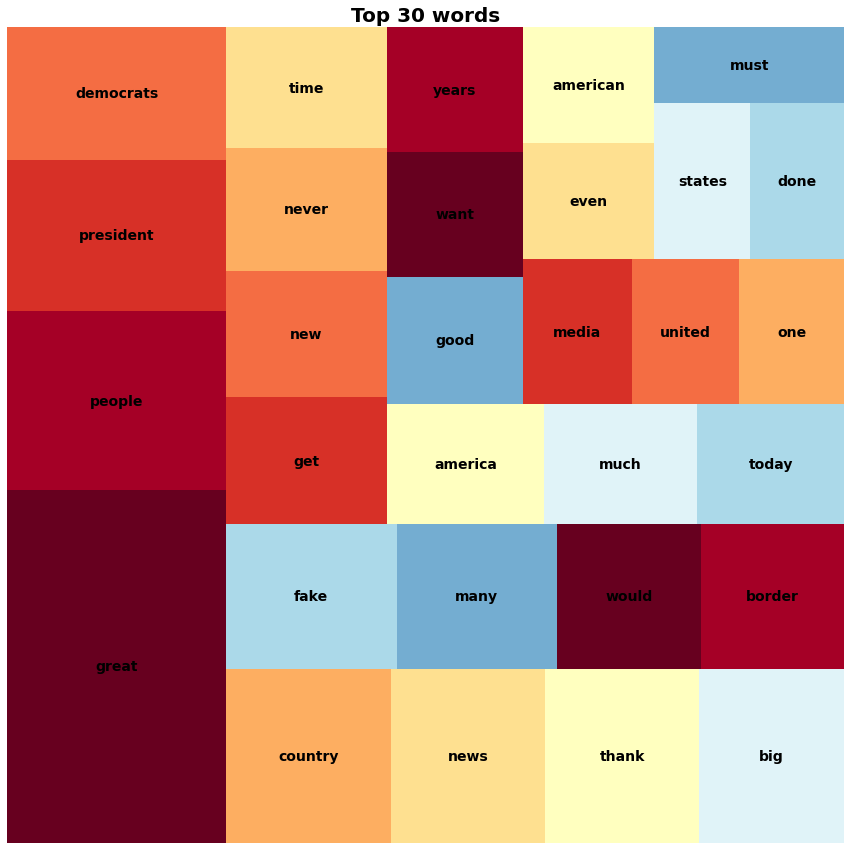

In [34]:
business_year=df[(df['year'])>=2017]

#trasforma parole in vettori
vec = CountVectorizer().fit(business_year['content'])

#trasforma vettori in matrici
bag_of_words = vec.transform(business_year['content'])

#somma i valori nelle colonne 
sum_words = bag_of_words.sum(axis=0) 

words_freq = [
    (word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()
]

words_freq_business_year =sorted(words_freq, key = lambda x: x[1], reverse=True)

y = dict(words_freq_business_year[:30])

# disegna il quadrato
fig = plt.figure(figsize=(15, 15))

squarify.plot(
    sizes = y.values(), #dimensione quadrato dipende dalla freq
    label = y.keys(), 
    color=sns.color_palette(colorblind, n_colors=10),
    linewidth=4, 
    text_kwargs={'fontsize':14, 'fontweight' : 'bold'})

plt.title('Top 30 words', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [35]:
header = ['word', 'freq']

with open('words_freq_business_year.csv', 'w', encoding = 'utf8', newline ='') as f: 
    write = csv.writer(f) 
    write.writerow(header) 
    write.writerows(words_freq_business_year) 

In [19]:
df_business_year= pd.read_csv("words_freq_business_year.csv")
df_business_year = df_business_year[:20]

colors = ['#92c5de',] * 20
colors[0] = '#f46d43'


fig = go.Figure(data=[go.Bar(
    x=df_business_year['word'],
    y=df_business_year['freq'],
    marker_color=colors, # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text="Numbers vs Years")

#### 11.2 Durning election campaign - TREE MAPS

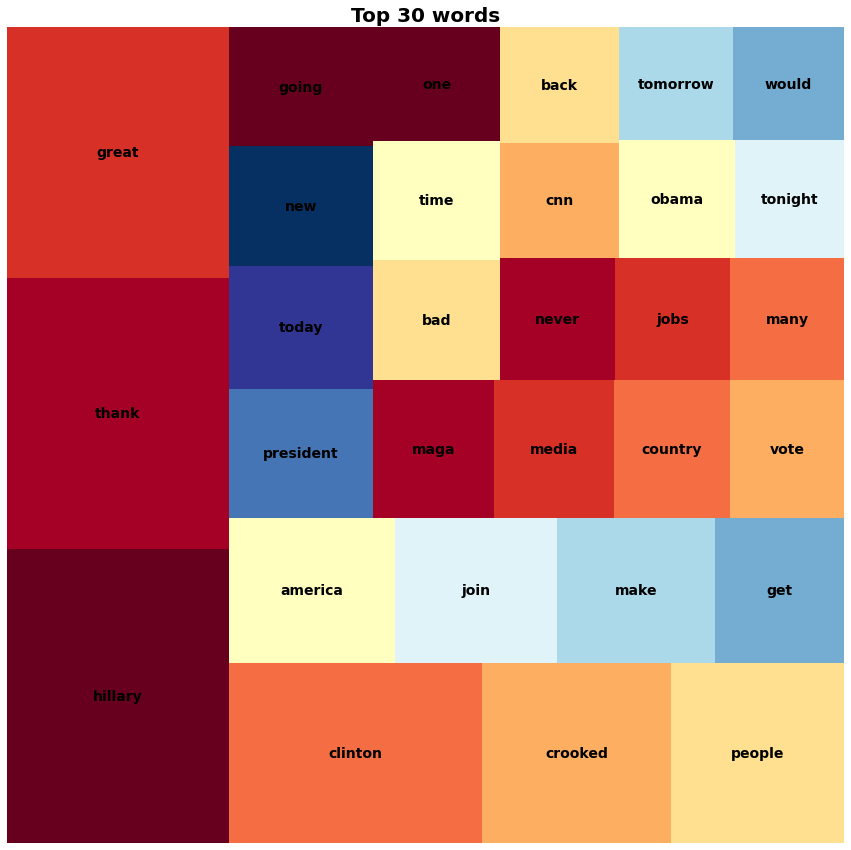

In [37]:
compain_year=df[
    ((df['year']) == 2016) & 
    ((df['month']) >5) | ((df['year']) == 2017) &
    ((df['month'])==1)
]

vec = CountVectorizer().fit(compain_year['content'])
bag_of_words = vec.transform(compain_year['content'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_election_year =sorted(words_freq, key = lambda x: x[1], reverse=True)

y_compain =dict(words_freq_election_year[:30])

fig = plt.figure(figsize=(15, 15))
squarify.plot(
    sizes = y_compain.values(), 
    label = y_compain.keys(), 
    color=sns.color_palette(colorblind, n_colors=20),
    linewidth=4, 
    text_kwargs={'fontsize':14, 'fontweight' : 'bold'}
)
plt.title('Top 30 words', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [38]:
header = ['word', 'freq']

with open('words_freq_election_year.csv', 'w', encoding = 'utf8', newline ='') as f: 
    write = csv.writer(f) 
    write.writerow(header) 
    write.writerows(words_freq_election_year) 

In [20]:
df_election_year= pd.read_csv("words_freq_election_year.csv")
df_election_year = df_election_year[:20]

colors = ['#92c5de',] * 20
colors[0] = '#fdae61'
colors[2] = '#f46d43'

fig = go.Figure(data=[go.Bar(
    x=df_election_year['word'],
    y=df_election_year['freq'],
    marker_color=colors, # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text="Numbers vs Years")

#### 11.3 Durning presidential year

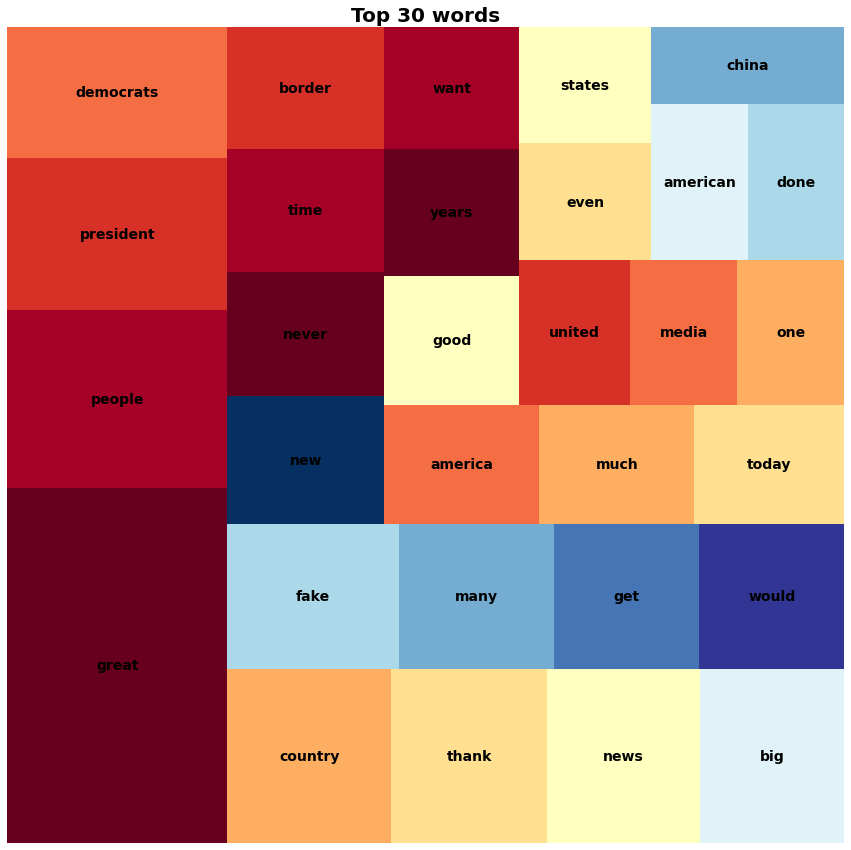

In [44]:
president_year=df[((df['year']>=2017) &(df['month']>1))]

vec = CountVectorizer().fit(president_year['content'])
bag_of_words = vec.transform(president_year['content'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_president_year =sorted(words_freq, key = lambda x: x[1], reverse=True)

y =dict(words_freq_president_year[:30])

fig = plt.figure(figsize=(15, 15))
squarify.plot(
    sizes = y.values(), label = y.keys(), color=sns.color_palette(colorblind, n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 30 words', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [41]:
header = ['word', 'freq']

with open('words_freq_president_year.csv', 'w', encoding = 'utf8', newline ='') as f: 
    write = csv.writer(f) 
    write.writerow(header) 
    write.writerows(words_freq_president_year) 

In [17]:
df_president_year= pd.read_csv("words_freq_president_year.csv")
df_president_year = df_president_year[:20]

colors = ['#92c5de',] * 20
colors[0] = '#f46d43'

fig = go.Figure(data=[go.Bar(
    x=df_president_year['word'],
    y=df_president_year['freq'],
    marker_color=colors, # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text="Numbers vs Years")